# Exercise 4

# Problem 1

## Importing necessary libraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

## Importing training dataset

In [2]:
trainData = pd.read_csv('train.csv')
trainData.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Problem 1: Predicting SalePrice using GrLivArea

### a) Create appropriate datasets for Train and Test in an 80:20 ratio and fit a Linear Regression model on the Train set to predict SalePrice using GrLivArea. Print the coefficients of your model and plot the regression line.

Regression Intercept : b =  [25073.84127775]
Regression Coefficients : a =  [[102.75742446]]



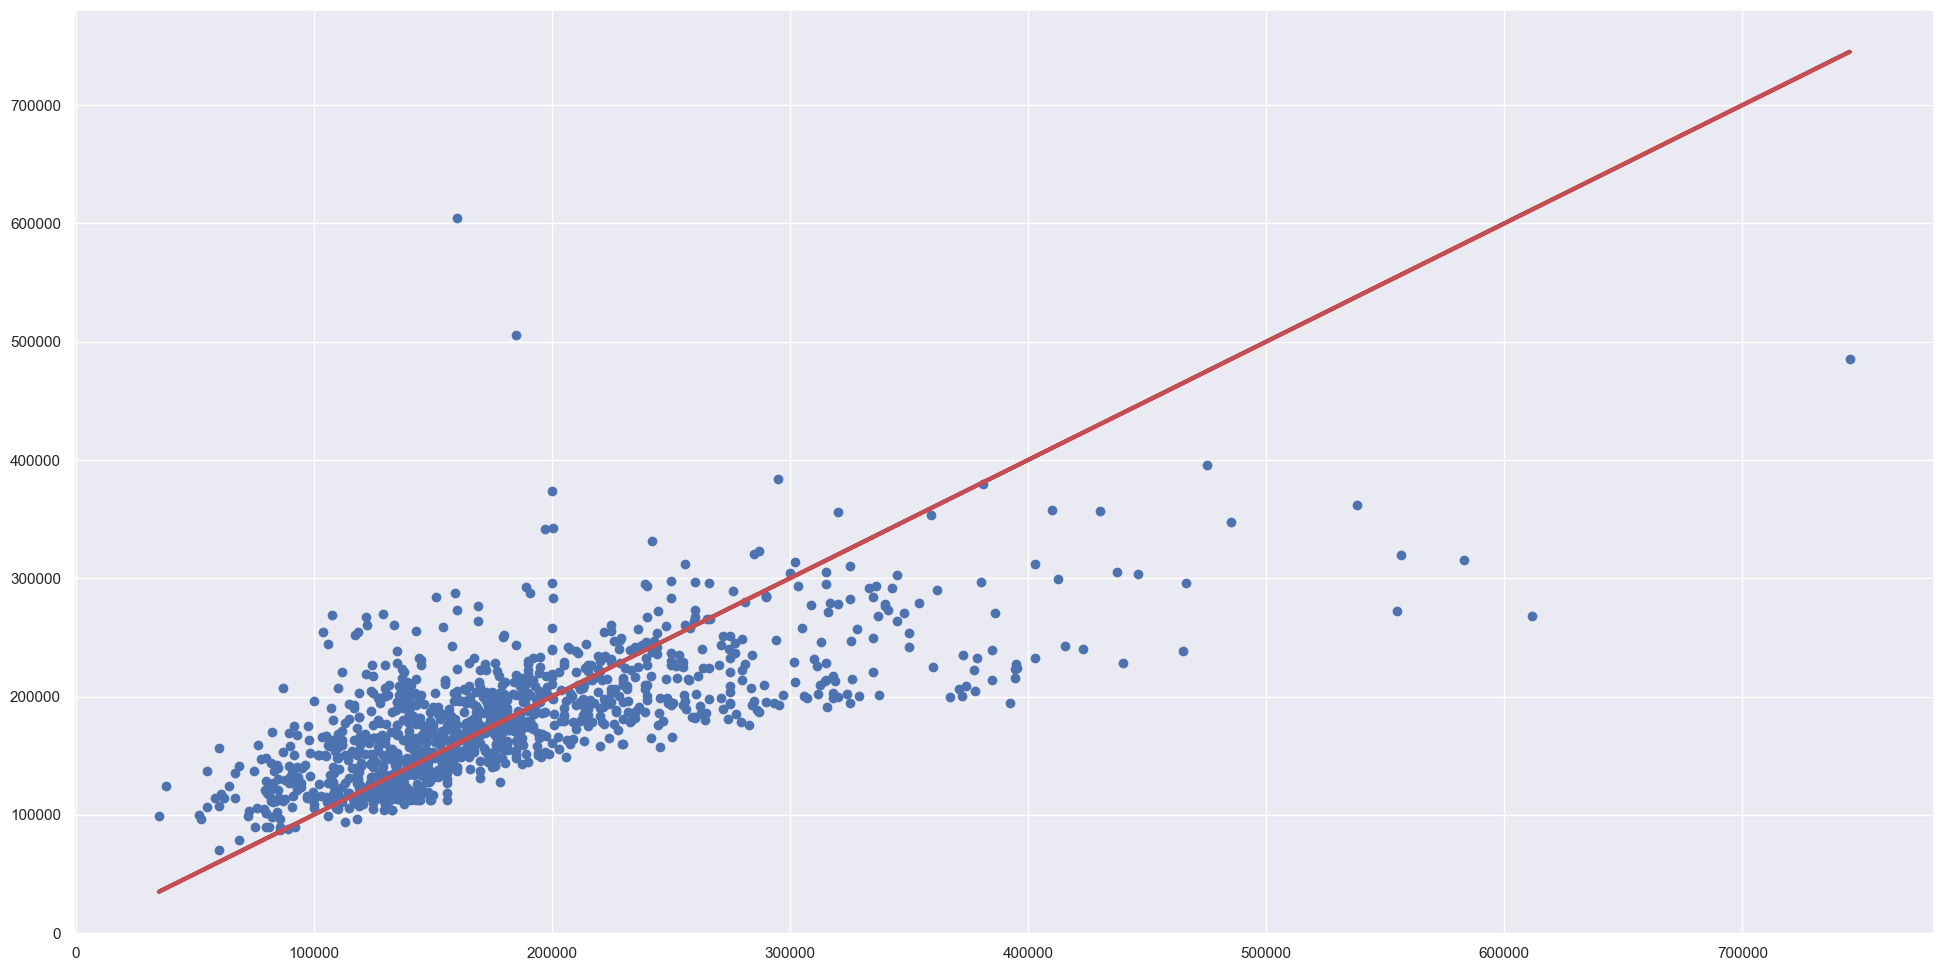

In [3]:
# Firstly, we import the essential models and functions from sklearn to be accessed
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Import the SalePrice and GrLivArea datasets as response and predictor respectively
SalePrice = pd.DataFrame(trainData['SalePrice']) #response
GrLivArea = pd.DataFrame(trainData['GrLivArea']) #predictor

# Split the dataset into 1 group for training and 1 group for testing
x_train, x_test, y_train, y_test = train_test_split(GrLivArea, SalePrice, test_size = 0.20)

# Creating the linear Regression object and model using the train data
linearreg = LinearRegression()         
linearreg.fit(x_train, y_train)        

# Printing the coefficients (a and b) of the Linear Regression line
print('Regression Intercept : b = ', linearreg.intercept_)
print('Regression Coefficients : a = ', linearreg.coef_)
print()

# Predicting SalePrice values corresponding to GrLivArea
y_train_pred = linearreg.predict(x_train)
y_test_pred = linearreg.predict(x_test)

# Plot the regression line
f = plt.figure(figsize=(24, 12))
plt.scatter(y_train, y_train_pred, color = "b")
plt.plot(y_train, y_train, 'r-', linewidth = 3)

### b) Check the Goodness of Fit of the model on the Train set and Prediction Accuracy of the model on the Test set. Print the metrics for Goodness of Fit and Prediction Accuracy that you think are appropriate in each scenario.

In [4]:
# For this, i have selected Explained Variance (R^2)
print("Explained Variance (R^2) value :", linearreg.score(x_train, y_train))

Explained Variance (R^2) value : 0.4773408873771281


In [5]:
#Test the Linear Regression model using the Test set Metrics Selected: Mean Squared Error

print("Goodness of Fit of Model \t  Test Dataset")
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt( mean_squared_error(y_test, y_test_pred)))
print()

Goodness of Fit of Model 	  Test Dataset
Mean Squared Error (MSE) 	: 3085150532.66132
Root Mean Squared Error (RMSE) 	: 55544.1313971271



## Problem 2: Predicting SalePrice using Other Variables

### Following the steps from the previous problem, build two new uni-variate Linear Regression models to predict SalePrice using the variables TotalBsmtSF and GarageArea, individually. Justify which of the three models is the best in this case.

Intercept of Regression 	: b =  [68085.7392097]
Coefficients of Regression 	: a =  [[107.94562047]]

Intercept of Regression 	: b =  [69211.39397854]
Coefficients of Regression 	: a =  [[236.08007528]]



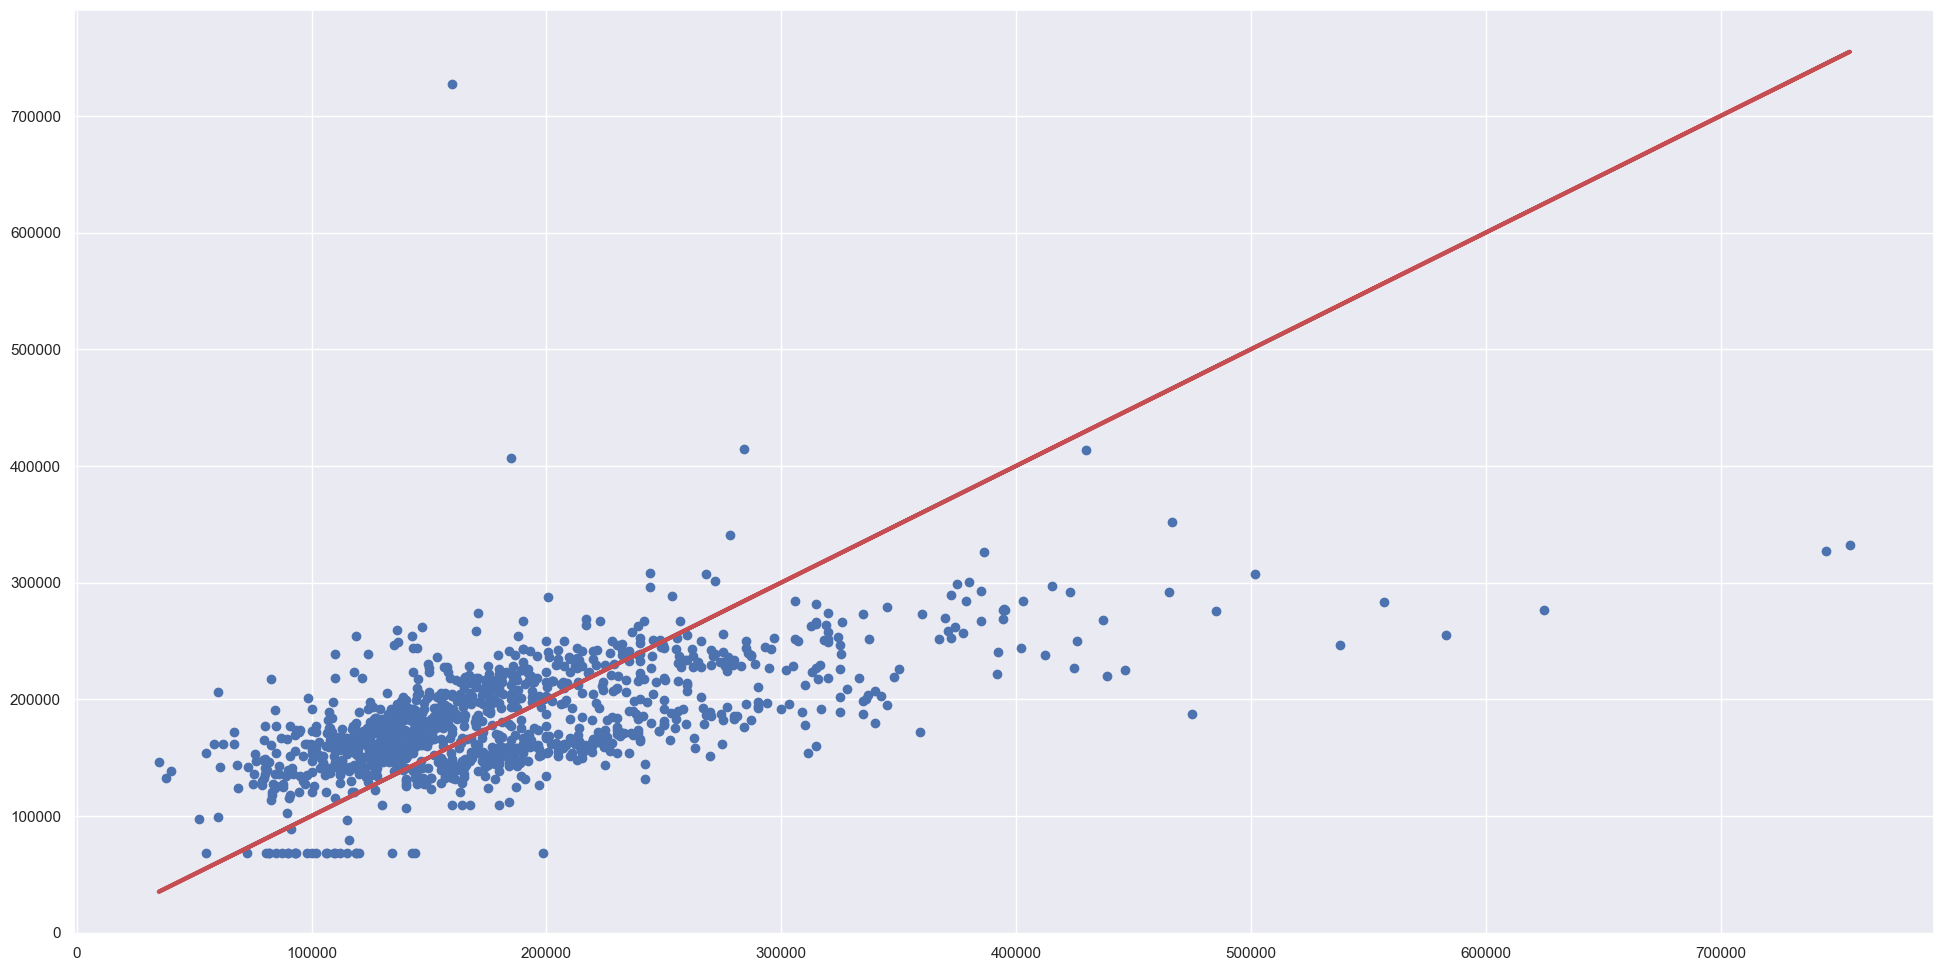

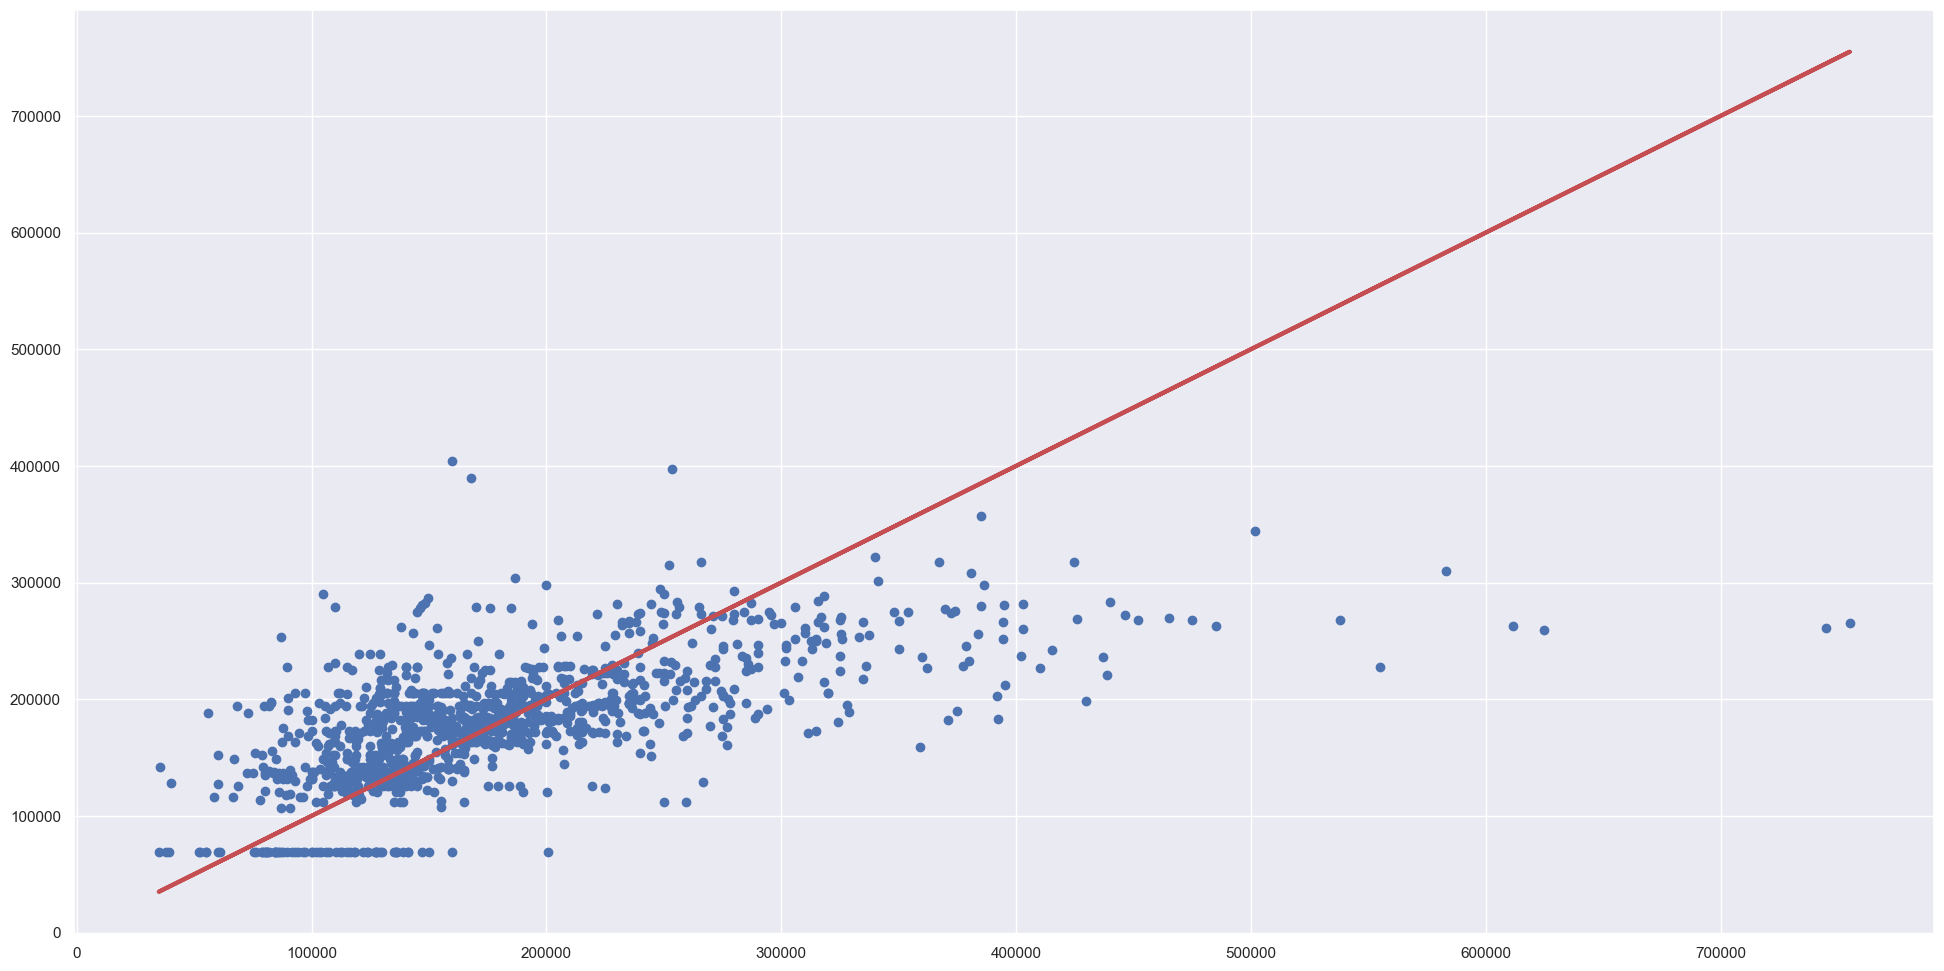

In [6]:
TotalBsmtSF = pd.DataFrame(trainData['TotalBsmtSF'])
GarageArea = pd.DataFrame(trainData['GarageArea'])

# Regression function to do regression on variables.
def regression_func(predictor, resp):
    
    # Split the Dataset into Train and Test
    x_train, x_test, y_train, y_test = train_test_split(predictor, resp, test_size = 0.20)

    # Linear Regression using Train Data
    linearreg = LinearRegression()         # create the linear regression object
    linearreg.fit(x_train, y_train)        # train the linear regression model

    # Coefficients of the Linear Regression line
    print('Intercept of Regression \t: b = ', linearreg.intercept_)
    print('Coefficients of Regression \t: a = ', linearreg.coef_)
    print()

    # Predict SalePrice values corresponding to predictor
    y_train_pred = linearreg.predict(x_train)
    y_test_pred = linearreg.predict(x_test)

    # Plot the regression line
    f = plt.figure(figsize=(24, 12))
    plt.scatter(y_train, y_train_pred, color = "b")
    plt.plot(y_train, y_train, 'r-', linewidth = 3)

regression_func(TotalBsmtSF,SalePrice)
regression_func(GarageArea,SalePrice)

### Now we create a function to test the Goodness of Fit using the Test Set

In [7]:
# function to test goodness of fit using the Test Set
def gof_func(predictor, response):
    # Split the Dataset into Train and Test
    x_train, x_test, y_train, y_test = train_test_split(predictor, response, test_size=0.20)

    # Linear Regression using Train Data
    linearreg = LinearRegression()  # create the linear regression object
    linearreg.fit(x_train, y_train)  # train the linear regression model

    # Predict SalePrice values corresponding to predictor
    y_train_pred = linearreg.predict(x_train)
    y_test_pred = linearreg.predict(x_test)

    # Mean Squared Error (MSE)
    def mean_sq_err(actual, predicted):
        # The following line returns the MSE of both the actual and predicted values
        return np.mean(np.square(np.array(actual) - np.array(predicted)))

    mse = mean_sq_err(y_test, y_test_pred)
    print("Mean Squared Error (MSE) \t:", mse)
    print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

    
    
#Having done the function, we now use it to compare the three models against each other
print("GrLivArea vs. SalePrice")
gof_func(GrLivArea,SalePrice)
print("")

print("TotalBsmtSF vs. SalePrice")
gof_func(TotalBsmtSF,SalePrice)

print("")

print("GaragArea vs. SalePrice")
gof_func(GarageArea,SalePrice)

GrLivArea vs. SalePrice
Mean Squared Error (MSE) 	: 2697188575.342112
Root Mean Squared Error (RMSE) 	: 51934.46423466899

TotalBsmtSF vs. SalePrice
Mean Squared Error (MSE) 	: 3143777977.4496536
Root Mean Squared Error (RMSE) 	: 56069.40322002414

GaragArea vs. SalePrice
Mean Squared Error (MSE) 	: 5133002253.272083
Root Mean Squared Error (RMSE) 	: 71644.97367765644


### Based on the presented results, it is evident that GrLivArea exhibits the lowest Root Mean Square Error (MSE) value. Therefore, we can confidently conclude that the model involving GrLivArea and SalePrice is the most effective for prediction.

### Problem 3 : Refining the Models to Predict SalePrice

### (a) Find the houses (rows) that are “outliers” for GrLivArea and/or SalePrice. This means outliers for GrLivArea UNION outliers for SalePrice in a set notation. Remove all these “outliers” from the dataset so that it is clean.

### To solve the problem, we can write a function to remove all the outliers from the dataframe first.

In [8]:
def findOutlierBound(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    print("Lower:", q1 - 1.5 * iqr)
    print("Upper:", q3 + 1.5 * iqr)
    print("")


findOutlierBound(trainData, "SalePrice")
findOutlierBound(trainData, "GrLivArea")


#! instruction to perform bit wise comparison
df_filtered = trainData[(trainData["SalePrice"] <= 340037.5) & (trainData["SalePrice"] >= 3937.5) & (trainData["GrLivArea"] <= 2747.625)& (trainData["GrLivArea"] >= 158.625)]


saleprice_cleaned = pd.DataFrame(df_filtered['SalePrice'])
grlivarea_cleaned = pd.DataFrame(df_filtered['GrLivArea'])

Lower: 3937.5
Upper: 340037.5

Lower: 158.625
Upper: 2747.625



### (b) In the outlier-free dataset, create Train and Test sets with an 80:20 ratio, and fit a Linear Regression model on the Train set to predict SalePrice using GrLivArea. Print the model coefficients and plot the regression line.

### Since we have created the regression function in Problem 2, we can reuse it to print the model coefficients and plot the regression line

Intercept of Regression 	: b =  [31870.86968746]
Coefficients of Regression 	: a =  [[94.78826219]]



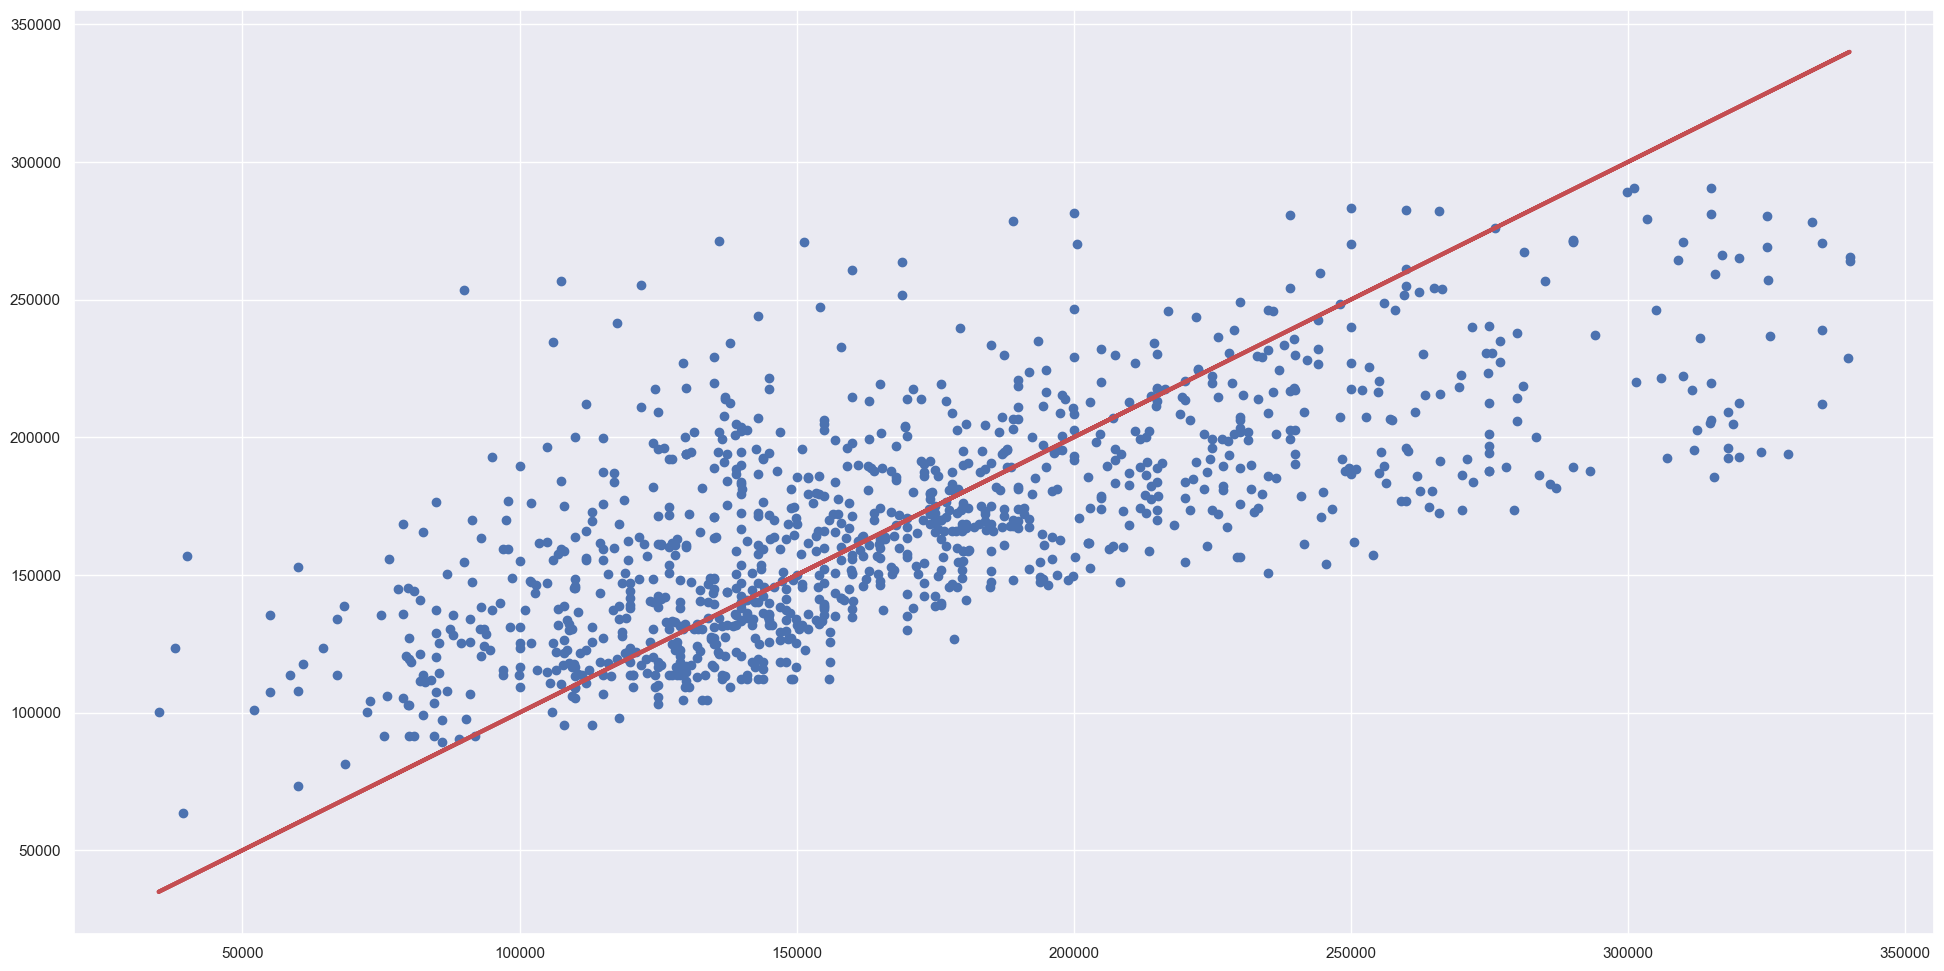

In [9]:
regression_func(grlivarea_cleaned, saleprice_cleaned)

### (c) Check the Goodness of Fit of the model on the Train set and Prediction Accuracy of the model on the Test set. Do you think this model is better than the model obtained in Problem 1 for the same variables? Briefly justify.

In [10]:
#Train Set
def gof_func_train(predictor, response):
    # Split the Dataset into Train and Test
    X_train, X_test, y_train, y_test = train_test_split(
        predictor, response, test_size=0.20
    )

    # Linear Regression using Train Data
    linreg = LinearRegression()  # create the linear regression object
    linreg.fit(X_train, y_train)  # train the linear regression model

    # Predict SalePrice values corresponding to predictor
    y_train_pred = linreg.predict(X_train)
    y_test_pred = linreg.predict(X_test)

    # Explained Variance (R^2)
    print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
    # Mean Squared Error (MSE)
    def mean_sq_err(actual, predicted):
        """Returns the MSE of actual and predicted values"""
        return np.mean(np.square(np.array(actual) - np.array(predicted)))

    
print("Train: grlivarea_cleaned vs. saleprice_cleaned")
gof_func_train(grlivarea_cleaned, saleprice_cleaned)
print("")

#Test Set
print("Test: grlivarea_cleaned vs. saleprice_cleaned")
gof_func(grlivarea_cleaned, saleprice_cleaned)

Train: grlivarea_cleaned vs. saleprice_cleaned
Explained Variance (R^2) 	: 0.4807226966058632

Test: grlivarea_cleaned vs. saleprice_cleaned
Mean Squared Error (MSE) 	: 1936426298.2387836
Root Mean Squared Error (RMSE) 	: 44004.84403152434


### When comparing the model obtained in Question 1 to the new one, we find that while the Explained Variance on the training set is similar to the original model, the Root Mean Squared Error (RMSE) is significantly lower. Consequently, I infer that the new model demonstrates superior predictive performance compared to the original model.